<a href="https://colab.research.google.com/github/cjaucian/MAT421/blob/main/ModuleB_17_4_5.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**17.4 Lagrange Polynomial Interpolation**

A single polynomial that will pass through all of the points of a given data set is called Lagrange polynomial interpolation. The polynomial, L(x), is called the Lagrange polynomial. One feature of L(x), since it is an interpolation function, is that L(x_i) = y_i for each of the points in the data set.

To compute Lagrange polynomials, it is necessary to write them as a combination of Lagrange basis polynomials, Pi(x). The linear combination, Pi(x), is defined as the product of (x - xj)/(xi - xj) for j = 1 and j does not equal i.

The Lagrange basis polynomials, Pi(x) are then used for L(x). Then, L(x) is equal to the sum of yi*Pi(x) when i = 1.



**Example**  Find the Lagrange basis polynomials for the dataset x = [-1,0,1] and y = [2,4,3]. Plot each polynomial.

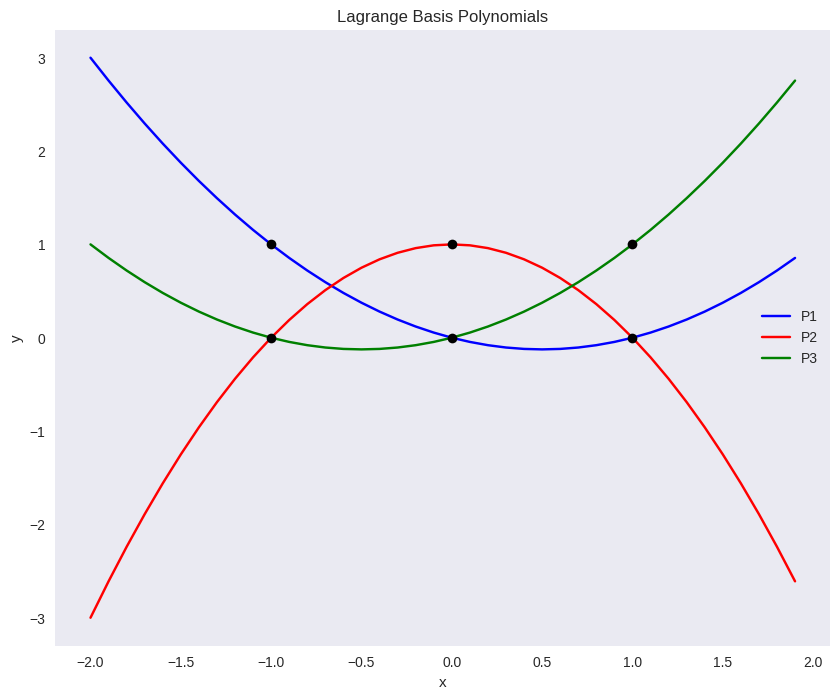

In [2]:
import numpy as np
import numpy.polynomial.polynomial as poly
import matplotlib.pyplot as plt

plt.style.use("seaborn-v0_8")

# calculations completed by hand
x = [-1,0,1]
y = [2,4,3]
P1_coeff = [0,-0.5,0.5]
P2_coeff = [1,0,-1]
P3_coeff = [0,0.5,0.5]

# get the polynomial function
P1 = poly.Polynomial(P1_coeff)
P2 = poly.Polynomial(P2_coeff)
P3 = poly.Polynomial(P3_coeff)

x_new = np.arange(-2.0, 2.0, 0.1)

fig = plt.figure(figsize = (10,8))
plt.plot(x_new, P1(x_new), "b", label = "P1")
plt.plot(x_new, P2(x_new), "r", label = "P2")
plt.plot(x_new, P3(x_new), "g", label = "P3")

plt.plot(x, np.ones(len(x)), "ko", x, np.zeros(len(x)), "ko")
plt.title("Lagrange Basis Polynomials")
plt.xlabel("x")
plt.ylabel("y")
plt.grid()
plt.legend()
plt.show()

**Example**  Using the previous example, compute and plot the Lagrange polynomial. Verify that it goes through each data point.

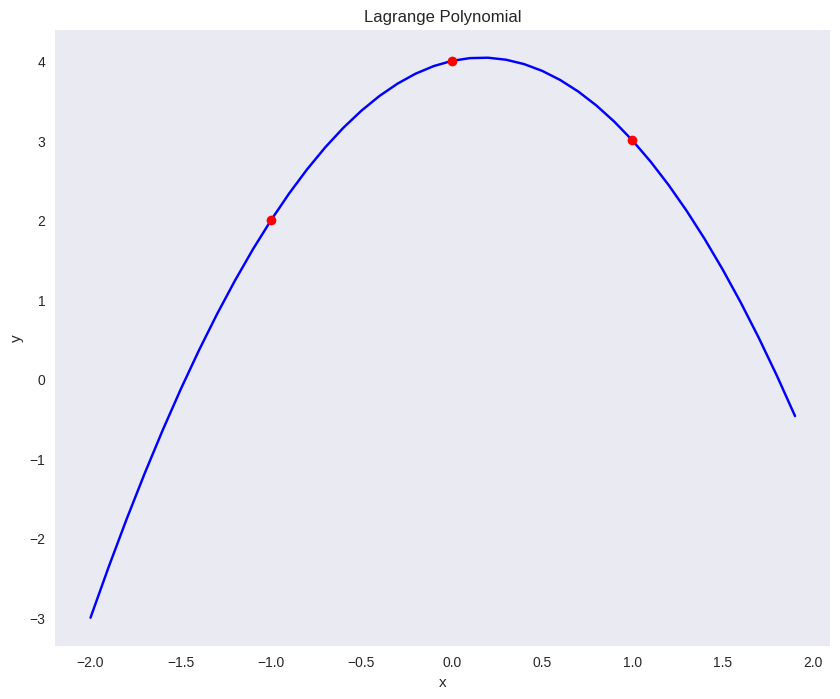

In [3]:
L = 2*P1 + 4*P2 + 3*P3

fig = plt.figure(figsize = (10,8))
plt.plot(x_new, L(x_new), "b", x, y, "ro")
plt.title("Lagrange Polynomial")
plt.grid()
plt.xlabel("x")
plt.ylabel("y")
plt.show()

The previous example(s) were calculated by hand, but in SciPy it is possible to use the lagrange function to interpolate the data from the data set. This will be done in the next example, using the same data set.

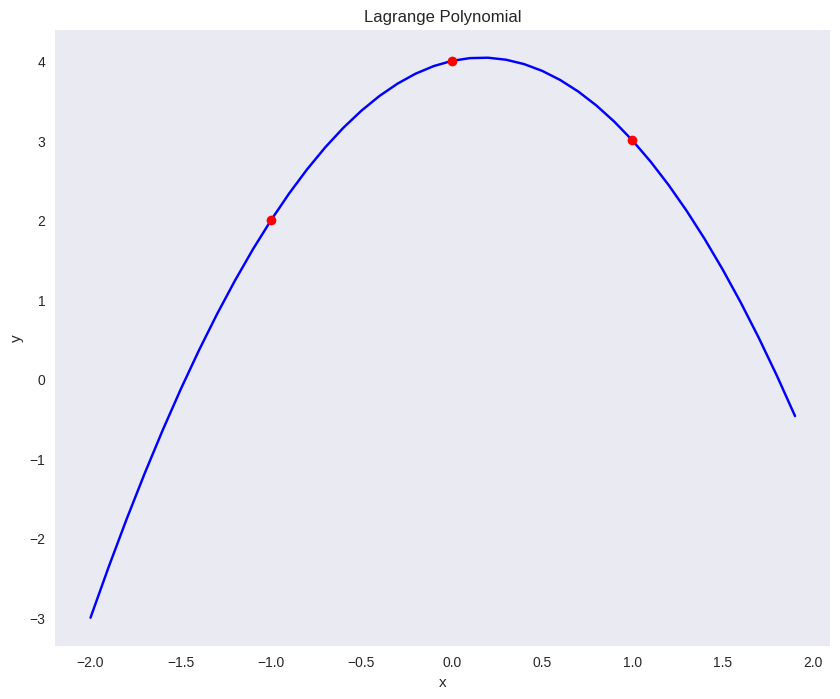

In [5]:
from scipy.interpolate import lagrange

f = lagrange(x,y)

fig = plt.figure(figsize = (10,8))
plt.plot(x_new, f(x_new), "b", x, y, "ro")
plt.title("Lagrange Polynomial")
plt.grid()
plt.xlabel("x")
plt.ylabel("y")
plt.show()

**17.5 Newton's Polynomial Interpolation**

Another method to exactly fit a data set is Newton's polynomial interpolation. We will need to use:

f(x) = a0 + a1(x - x0) + a2(x - x0)(x - x1) + ... + an(x - x0)(x - x1)...(x - xn)

for the (n - 1)th order Newton's polynomial for n points.

We can also define f(x) as the sum of ai*ni(x) for i = 0. Where ni(x) is defined as the product of (x - xj), with j = 0.

This method can be calculated by hand using divided differences, and input into a divided differences table. After the coefficients have been found, it is easy to add more data points to the original set because it does not change the coefficients that have already been found.

**Example**  Calculate the divided difference table for x = [-4, 0, 1, 2, 3], y = [0, 10, 2, 5, 7]

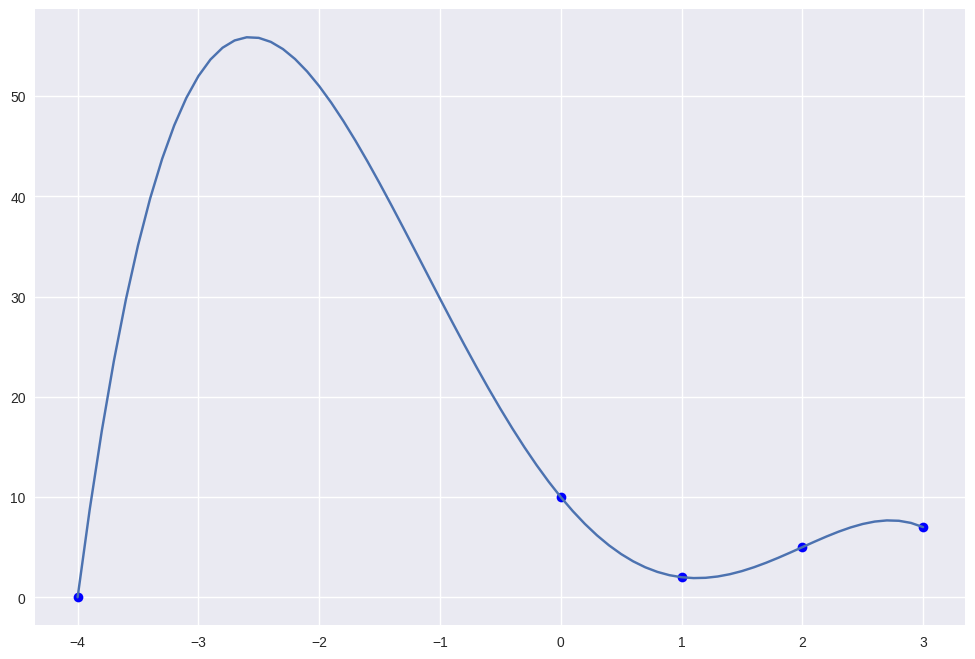

In [6]:
import numpy as np
import matplotlib.pyplot as plt

plt.style.use("seaborn-v0_8")

%matplotlib inline

def divided_diff(x, y):
      # function to calculate the divided difference table

      n = len(y)
      coef = np.zeros([n, n])
      # the first column is y
      coef[:, 0] = y

      for j in range(1, n):
          for i in range(n - j):
              coef[i][j] = (coef[i + 1][j - 1] - coef[i][j - 1])/(x[i + j] - x[i])

      return coef

def newton_poly(coef, x_data, x):
      # evaluate the Newton polynomial at x

      n = len(x_data) - 1
      p = coef[n]

      for k in range(1, n+1):
          p = coef[n - k] + (x - x_data[n - k])*p
      return p

x = np.array([-4, 0, 1, 2, 3])
y = np.array([0, 10, 2, 5, 7])
# get the divided difference coef
a_s = divided_diff(x, y)[0, :]

# evaluate on new data points
x_new = np.arange(-4, 3.1, 0.1)
y_new = newton_poly(a_s, x, x_new)

plt.figure(figsize = (12,8))
plt.plot(x, y, "bo")
plt.plot(x_new, y_new)

The Newton's polynomial goes through each of the data points from the original part of the problem.